# Predicting Attrition Using Various Classification Models

Performing Classification to predict employee attrition based on features in the IBM HR Analytics Dataset using Logistic Regression, Decision Tree, Random Forest, XGBoost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [2]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [3]:
models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=0, class_weight='balanced')))
models.append(('Decision Tree', DecisionTreeClassifier(random_state=0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, random_state=0)))
models.append(('XGBoost', XGBClassifier(use_label_encoder=False)))

In [4]:
acc_results = []
auc_results = []
names = []

col = ['Model', 'ROC AUC Mean', 'ROC AUC Std', 'Accuracy Mean', 'Accuracy Std']

df_results = pd.DataFrame(columns=col)

i = 0
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_acc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_auc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)

    df_results.loc[i] = [
        name,
        round(cv_auc_results.mean() * 100, 2),
        round(cv_auc_results.std() * 100, 2),
        round(cv_acc_results.mean() * 100, 2),
        round(cv_acc_results.std() * 100, 2)
    ]

    i += 1

df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

c:\Users\arnav\anaconda3\envs\practice\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\arnav\anaconda3\envs\practice\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\arnav\anaconda3\envs\practice\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\arnav\anaconda3\envs\practice\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array w

Model  ROC AUC Mean  ROC AUC Std  Accuracy Mean  Accuracy Std
0  Logistic Regression         82.18         7.26          75.13          5.40
2        Random Forest         79.05         7.75          84.93          3.58
3              XGBoost         77.40         8.02          86.11          4.33
1        Decision Tree         59.93         6.63          76.22          3.94

It could be observed that Logistic Regression and Random Forest have the highest ROC AUC Mean score, this is a better measure for comparing model performance when there is a class imbalance involved as we have with this dataset than accuracy score. Thus, Logistic Regression and Random Forest could be explored more and tuned for better performance. 

In [5]:
kfold = KFold(n_splits=10)
modelCV = LogisticRegression(solver='liblinear',
                             class_weight="balanced", 
                             random_state=0)
scoring = 'roc_auc'
results = cross_val_score(
    modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC score (Std): %.2f (%.2f)" % (results.mean(), results.std()))

AUC score (Std): 0.82 (0.07)


c:\Users\arnav\anaconda3\envs\practice\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\arnav\anaconda3\envs\practice\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\arnav\anaconda3\envs\practice\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\arnav\anaconda3\envs\practice\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array w

In [6]:
param_grid = {'C': np.arange(1e-03, 2, 0.01), 
              'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
              } # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression( # setting GridSearchCV
                                         class_weight="balanced", 
                                         random_state=0),
                    #   iid=True,
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

c:\Users\arnav\anaconda3\envs\practice\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\arnav\anaconda3\envs\practice\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\arnav\anaconda3\envs\practice\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\arnav\anaconda3\envs\practice\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array w

best params: LogisticRegression(C=1.8509999999999995, class_weight='balanced',
                   random_state=0, solver='newton-cg')
best params: {'C': 1.8509999999999995, 'solver': 'newton-cg'}
best score: 0.8153312509357804


c:\Users\arnav\anaconda3\envs\practice\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\arnav\anaconda3\envs\practice\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\arnav\anaconda3\envs\practice\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\arnav\anaconda3\envs\practice\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\arnav\anaconda3\envs\practice\Lib\site-packages

Text(0.5, 427.9555555555555, 'Predicted label')

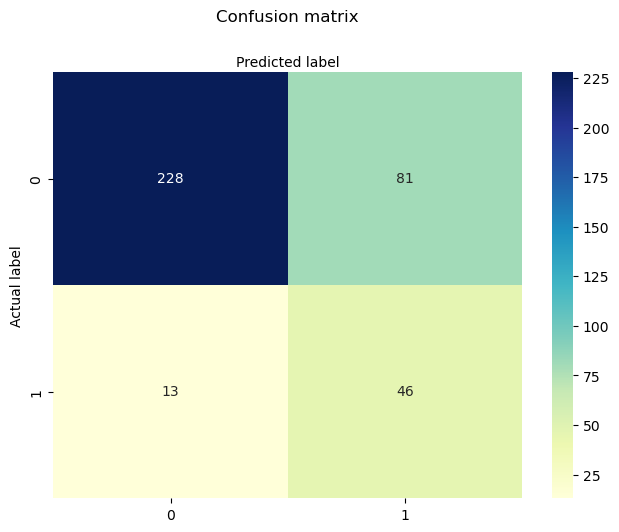

In [7]:
## Confusion Matrix
cnf_matrix = confusion_matrix(y_test, log_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [8]:
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(log_opt.score(X_test, y_test)*100))

Accuracy of Logistic Regression Classifier on test set: 74.46


In [9]:
# Classification report for the optimised Log Regression
log_opt.fit(X_train, y_train)
print(classification_report(y_test, log_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.95      0.74      0.83       309
         1.0       0.36      0.78      0.49        59

    accuracy                           0.74       368
   macro avg       0.65      0.76      0.66       368
weighted avg       0.85      0.74      0.78       368



c:\Users\arnav\anaconda3\envs\practice\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
log_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = log_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
logit_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % logit_roc_auc)

AUC score: 0.858


c:\Users\arnav\anaconda3\envs\practice\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The resulting AUC score is higher than that best score during the optimisation step. Predicting probabilities of a particular label provides us with a measure of how likely an employee is to leave the company.

## Hyper-parameter tuning Random Forest

In [11]:
rf_classifier = RandomForestClassifier(class_weight = "balanced",
                                       random_state=0, n_jobs=-1)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175, 200, 225, 250],
              'min_samples_split':[2, 4, 6, 8, 10],
              'min_samples_leaf': [1, 2, 3, 4, 5],
              'max_depth': [5, 10, 15, 20, 25, 50, 75, 100]}

grid_obj = GridSearchCV(rf_classifier,
                        return_train_score=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=10)

grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

print('='*20)
print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

c:\Users\arnav\anaconda3\envs\practice\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\arnav\anaconda3\envs\practice\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\arnav\anaconda3\envs\practice\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\arnav\anaconda3\envs\practice\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was exp

best params: RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=50, n_jobs=-1, random_state=0)
best params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
best score: 0.7939851864074288


c:\Users\arnav\anaconda3\envs\practice\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Text(0.5, 427.9555555555555, 'Predicted label')

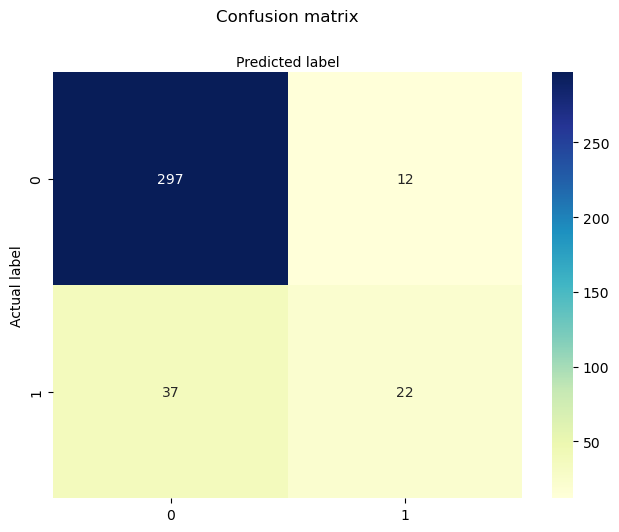

In [14]:
## Confusion Matrix
cnf_matrix = confusion_matrix(y_test, rf_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [15]:
print('Accuracy of RandomForest Regression Classifier on test set: {:.2f}'.format(rf_opt.score(X_test, y_test)*100))

Accuracy of RandomForest Regression Classifier on test set: 86.68


In [16]:
# Classification report for the optimised RF Regression
rf_opt.fit(X_train, y_train)
print(classification_report(y_test, rf_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92       309
         1.0       0.65      0.37      0.47        59

    accuracy                           0.87       368
   macro avg       0.77      0.67      0.70       368
weighted avg       0.85      0.87      0.85       368



c:\Users\arnav\anaconda3\envs\practice\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [17]:
rf_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = rf_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
rf_opt_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % rf_opt_roc_auc)

c:\Users\arnav\anaconda3\envs\practice\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


AUC score: 0.816


Plotting the ROC AUC Curve

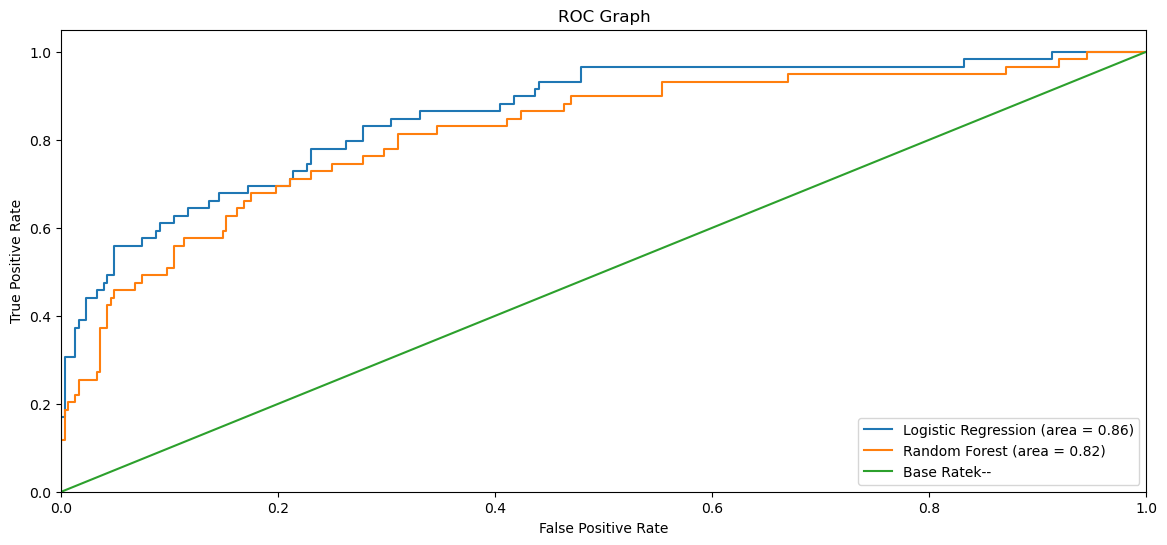

In [18]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_opt.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_opt.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_opt_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

From the ROC AUC Curve we can see that the tuned Logistic Regression model performs better than the Random Forest model as it is far from the baseline of a random guesser (green line). The ROC AUC Curve serves as a measure of performance for classification models where accuracy may not be a good indicator when it comes to certain predictions that are more undesirable, a classical example is when classifying an email as spam, it is less desirable that an email that is not spam is classified as spam (False Positive) than when a spam email gets classified as not spam (False Negative). 

#### Strong Indicators of Attrition

A very useful property of Random Forest is that the important features that have the highest contribution to decision nodes can be found out, this explainability of the Random Forest sets it apart from other models.

In [72]:
importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

NameError: name 'rf_opt' is not defined

In [13]:
importances = rf_opt.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(44):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

Feature  Coefficient
0      MonthlyIncome     0.095831
1           OverTime     0.082747
2                Age     0.055439
3          DailyRate     0.053289
4  TotalWorkingYears     0.052929
5        MonthlyRate     0.047334
6     YearsAtCompany     0.041988
7   DistanceFromHome     0.039736
8         HourlyRate     0.037006
9           JobLevel     0.034579

From this we can observe that MonthlyIncome, OverTime, Age, DailyRate, TotalWorkingYears among others have a higher weightage compared to other collected features. Based on these features we may be able to keep track of current employees or new employees and see if they are at risk of leaving.

In [3]:
df = pd.read_csv('cleaned_data.csv')

#### Monthly Income

Monthly Income of employees leaving: 4787.09
Monthly Income of employees staying: 6832.74


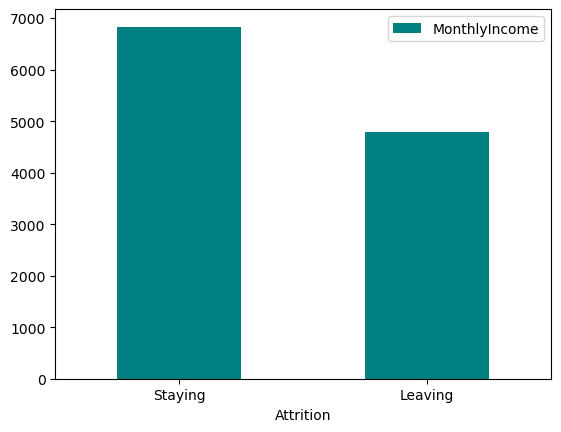

In [49]:
df_MonthlyIncome = df.loc[:, ["MonthlyIncome", "Attrition"]]
mi = df_MonthlyIncome.groupby(by='Attrition').mean()
print("Monthly Income of employees leaving: {}".format(round(mi.iloc[1, 0], 2)))
print("Monthly Income of employees staying: {}".format(round(mi.iloc[0, 0], 2)))

mi.plot(kind="bar", color='teal')
plt.xticks(ticks=[0, 1], labels=['Staying', 'Leaving'], rotation=0)
plt.show()

Clearly the assumption that paying higher monthly salary retains the employees is correct

#### Over Time


In [68]:
df_OverTime = df.loc[:, ["OverTime", "Attrition"]]
print("% of employees leaving having Over Time: {}".format(round(df_OverTime[df_OverTime['Attrition'] == 1].shape[0] / df_OverTime['Attrition'].shape[0] * 100, 2)))
print("% of employees staying having Over Time: {}".format(round(df_OverTime[df_OverTime['Attrition'] == 0].shape[0] / df_OverTime['Attrition'].shape[0] * 100, 2)))


% of employees leaving having Over Time: 16.12
% of employees staying having Over Time: 83.88


#### Age

Average Age of employees leaving: 33.61
Average Age of employees staying: 37.56


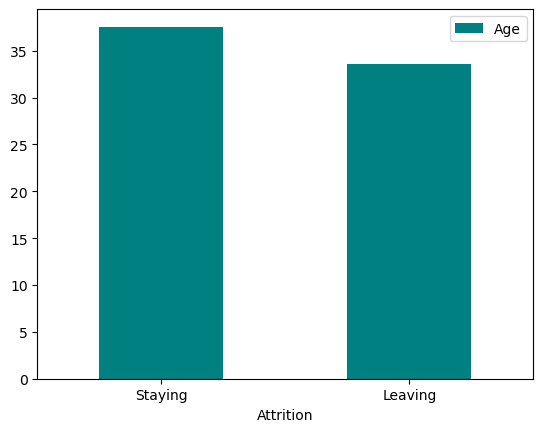

In [69]:
df_Age = df.loc[:, ["Age", "Attrition"]]
mi = df_Age.groupby(by='Attrition').mean()
print("Average Age of employees leaving: {}".format(round(mi.iloc[1, 0], 2)))
print("Average Age of employees staying: {}".format(round(mi.iloc[0, 0], 2)))

mi.plot(kind="bar", color='teal')
plt.xticks(ticks=[0, 1], labels=['Staying', 'Leaving'], rotation=0)
plt.show()

It may be observed that the average age of employees leaving is about 4 years youngers, may indicate that older employees may prefer job security and would like to stay in the same environment

#### Total Working Years

Total Working Years of employees leaving: 8.24
Total Working Years of employees staying: 11.86


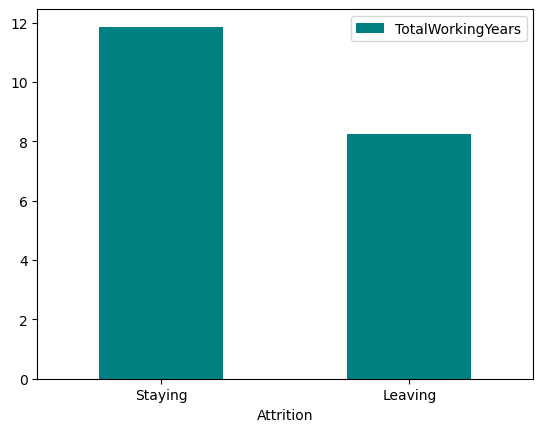

In [71]:
df_TotalWorkingYears = df.loc[:, ["TotalWorkingYears", "Attrition"]]
mi = df_TotalWorkingYears.groupby(by='Attrition').mean()
print("Total Working Years of employees leaving: {}".format(round(mi.iloc[1, 0], 2)))
print("Total Working Years of employees staying: {}".format(round(mi.iloc[0, 0], 2)))

mi.plot(kind="bar", color='teal')
plt.xticks(ticks=[0, 1], labels=['Staying', 'Leaving'], rotation=0)
plt.show()

This correlates to the age of the employees, the older ones with more experience seem to be liklier to stay